In [2]:
# Import Tensorflow for keras backend and keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob

In [3]:
x_train = []
y_train = []
x_test = []
y_test = []
low_green = np.array([25,52,72])
upp_green = np.array([102,255,255])
for i in range(12):
    for filename in glob.glob('Dataset/Train/'+str(i)+'/*.png'):
        im = cv2.imread(filename)        
        im = cv2.resize(im, (128, 128)) # resize to 128 * 128 pixel size
        hsv_image = cv2.cvtColor(im, cv2.COLOR_BGR2HSV) #convert BGR image to HSV for color descriptor
        green_mask = cv2.inRange(hsv_image, low_green, upp_green) # create green mask range
        green = cv2.bitwise_and(im, im, mask = green_mask)
        x_train.append(cv2.cvtColor(green, cv2.COLOR_BGR2GRAY)) # convert to grayscale, and append to array
        y_train.append(i) # append class
for filename in glob.glob('Dataset/Test/*.png'):
        im = cv2.imread(filename)
        im = cv2.resize(im, (128, 128))
        hsv_image = cv2.cvtColor(im, cv2.COLOR_BGR2HSV) #convert BGR image to HSV for color descriptor
        green_mask = cv2.inRange(hsv_image, low_green, upp_green) # create green mask range
        green = cv2.bitwise_and(im, im, mask = green_mask) # resize to 28 * 28 pixel size
        x_test.append(cv2.cvtColor(green, cv2.COLOR_BGR2GRAY)) 

In [4]:
x_train = np.array(x_train) / 255.0
x_test = np.array(x_test) / 255.0
y_train = np.array(y_train)
x_train.shape

(4750, 128, 128)

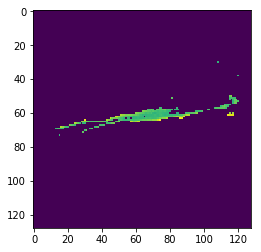

In [5]:
plt.imshow(x_train[0])
plt.show()

In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(128,128)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(12, activation='softmax')
])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2097280   
_________________________________________________________________
dense_1 (Dense)              (None, 12)                1548      
Total params: 2,098,828
Trainable params: 2,098,828
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
model.fit(x_train, y_train, epochs=50, shuffle=True, validation_split=0.3)

Train on 3325 samples, validate on 1425 samples
Epoch 1/50
3325/3325 [==============================] - 2s 535us/sample - loss: 1.8315 - acc: 0.3741 - val_loss: 10.4777 - val_acc: 0.0014
Epoch 2/50
3325/3325 [==============================] - 1s 313us/sample - loss: 1.2143 - acc: 0.6286 - val_loss: 12.4419 - val_acc: 0.0232
Epoch 3/50
3325/3325 [==============================] - 1s 317us/sample - loss: 0.7909 - acc: 0.7645 - val_loss: 12.8669 - val_acc: 0.0379
Epoch 4/50
3325/3325 [==============================] - 1s 317us/sample - loss: 0.5031 - acc: 0.8695 - val_loss: 12.8734 - val_acc: 0.0618
Epoch 5/50
3325/3325 [==============================] - 1s 313us/sample - loss: 0.2726 - acc: 0.9462 - val_loss: 12.7784 - val_acc: 0.1109
Epoch 6/50
3325/3325 [==============================] - 1s 309us/sample - loss: 0.1586 - acc: 0.9750 - val_loss: 12.9351 - val_acc: 0.0870
Epoch 7/50
3325/3325 [==============================] - 1s 312us/sample - loss: 0.0989 - acc: 0.9832 - val_loss: 12.99

In [9]:
model.evaluate(x_train,y_train)

4750/4750 [==============================] - 1s 150us/sample - loss: 4.0346 - acc: 0.7221


[4.034606651270713, 0.72210526]

In [10]:
predictions = model.predict(x_test)

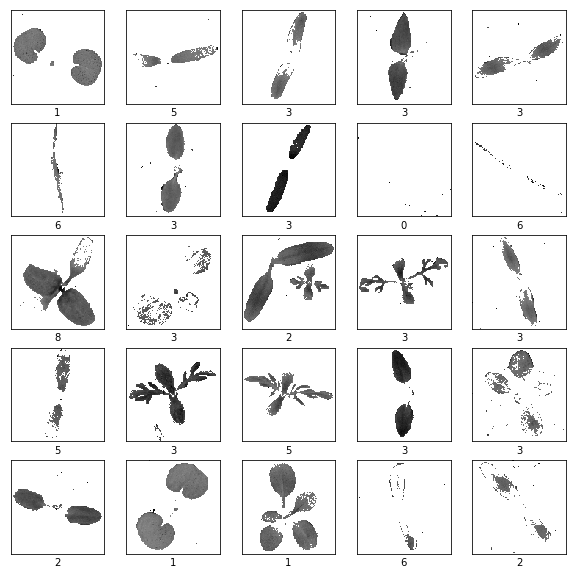

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(np.argmax(predictions[i]))
plt.show()

In [ ]:
cielab